# UAS Data Science – Demand & Customer Behavior Analysis

- Inayah - 1227500
- Muhammad Aditya Hafizh Zahran - 122705081

## Import Packages/Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

## Data Wrangling

### Gathering Data

In [40]:
import os
import pandas as pd

day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print("✅ Loaded:")
print(f"- day_df : shape={day_df.shape}")
print(f"- hour_df: shape={hour_df.shape}")

display(day_df.head(3))
display(hour_df.head(3))


✅ Loaded:
- day_df : shape=(731, 16)
- hour_df: shape=(17379, 17)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


**Insight:**
- Pada data tersebut terdapat columns yang berkaitan dengan musim
- Terdapat columns keterangan waktu yang menjadi informasi penting

### Assessing Data

In [41]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [42]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari table yang ditampilkan ada beberapa columns yang tidak akan digunakan 
- Kita akan mengubah tipe data dteday dan memfokuskan data pada season dan weatherist, dan mengubah tipe data dari season dan weatherist menjadi kategorikal


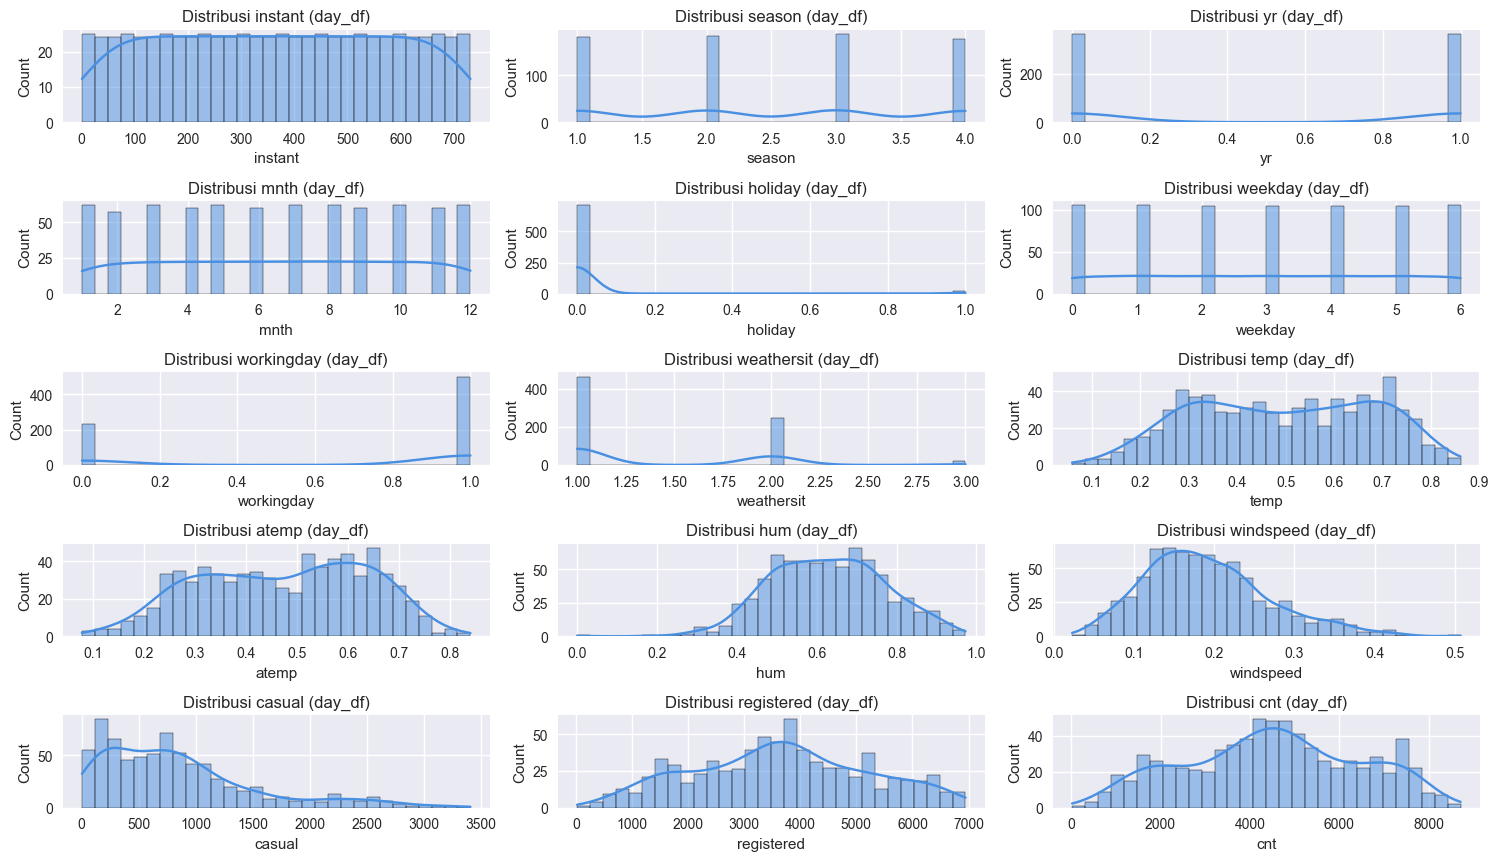

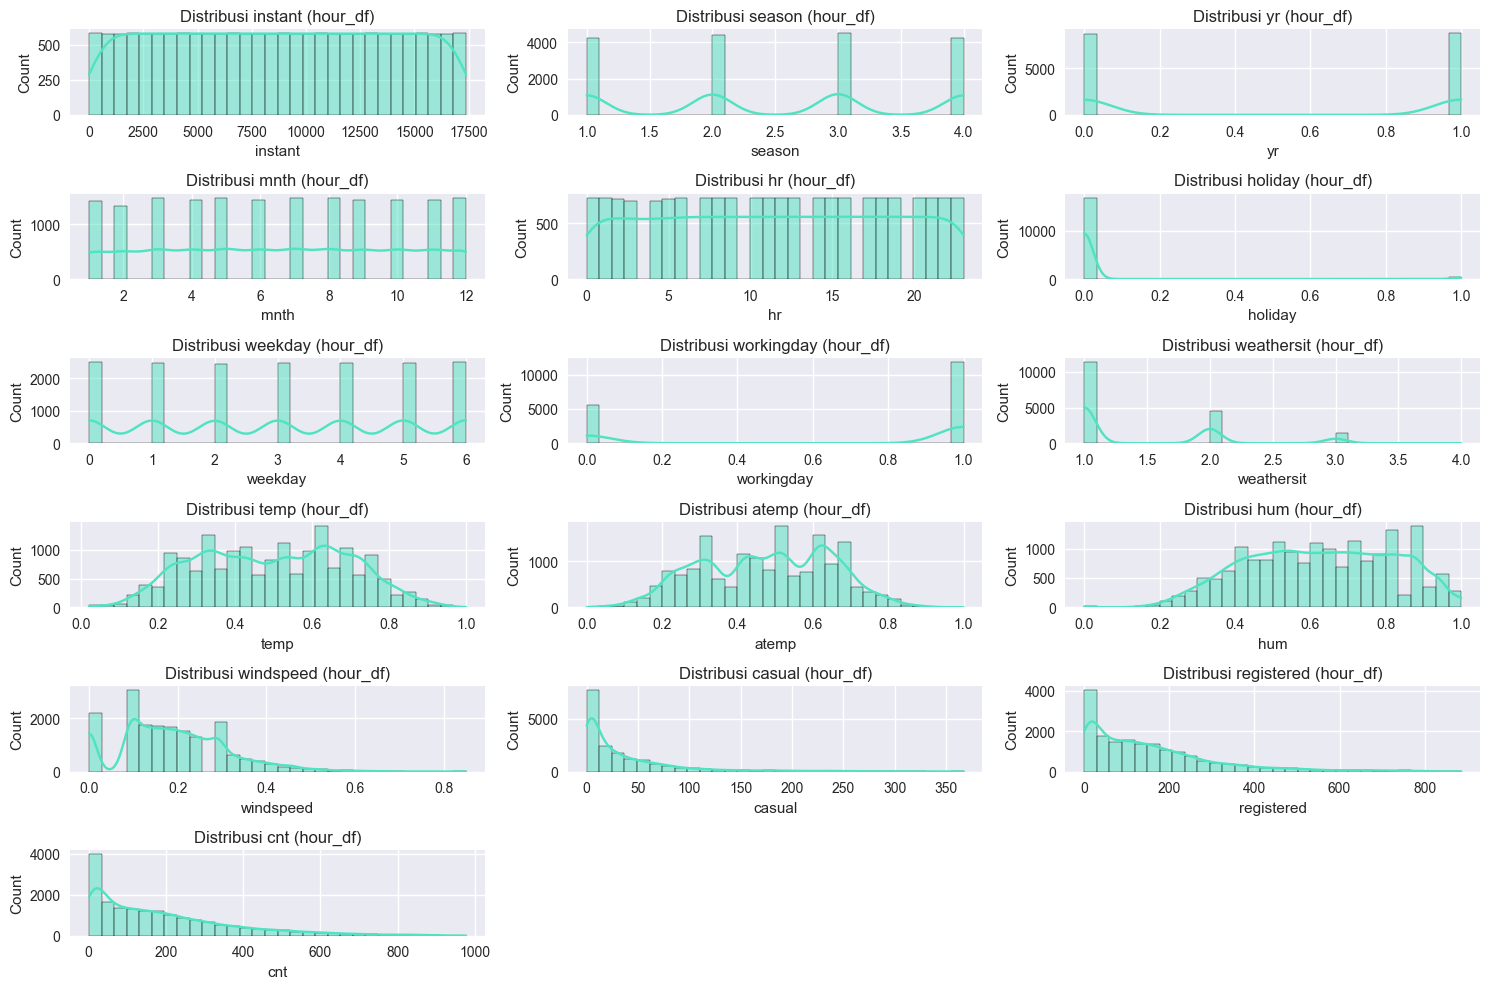

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Distribusi data day_df ---
numeric_day = day_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_day, 1):
    plt.subplot(len(numeric_day)//3 + 1, 3, i)
    sns.histplot(day_df[col], kde=True, color="#4A90E2", bins=30)
    plt.title(f"Distribusi {col} (day_df)")
plt.tight_layout()
plt.show()

# --- Distribusi data hour_df ---
numeric_hour = hour_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_hour, 1):
    plt.subplot(len(numeric_hour)//3 + 1, 3, i)
    sns.histplot(hour_df[col], kde=True, color="#50E3C2", bins=30)
    plt.title(f"Distribusi {col} (hour_df)")
plt.tight_layout()
plt.show()

# Statistik ringkas
display(day_df[numeric_day].describe().T)
display(hour_df[numeric_hour].describe().T)


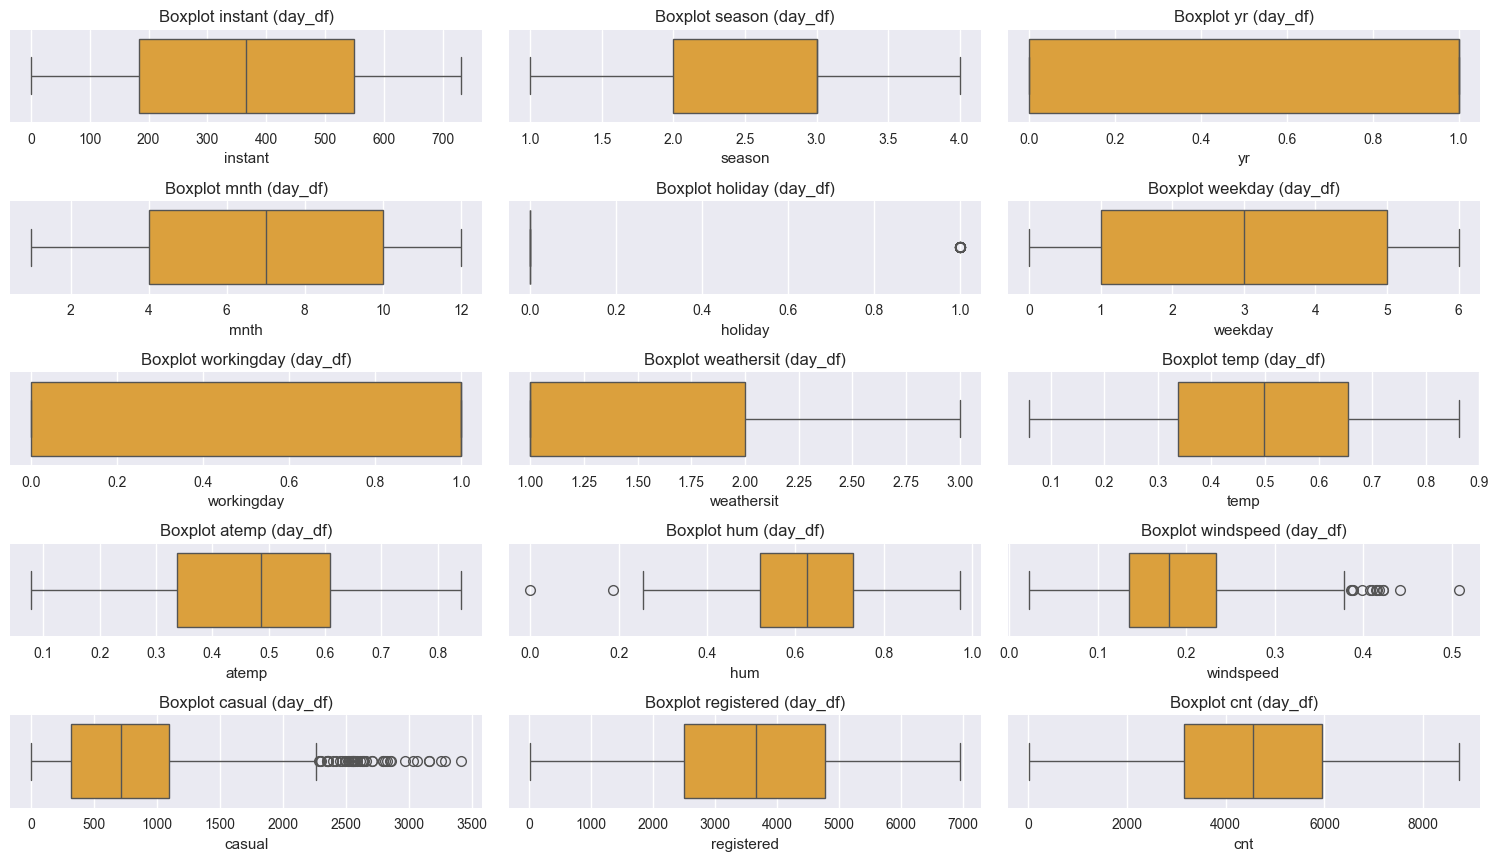

,Kolom,Jumlah Outlier
holiday,holiday,21
casual,casual,8
hum,hum,2
windspeed,windspeed,2
instant,instant,0
season,season,0
yr,yr,0
mnth,mnth,0
weekday,weekday,0
workingday,workingday,0


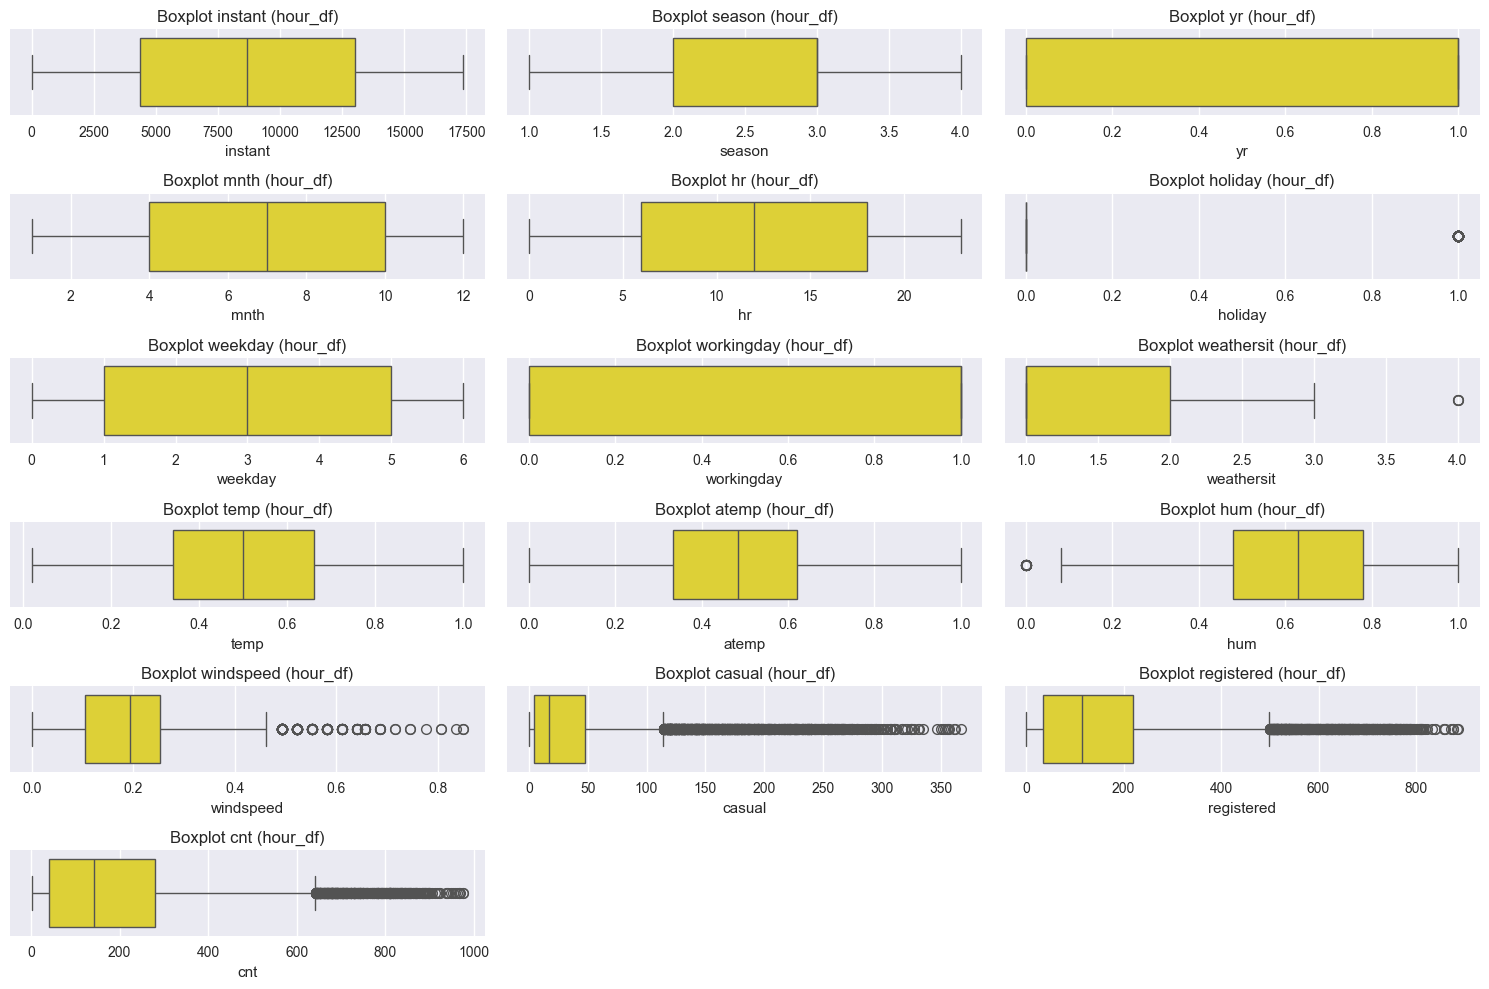

,Kolom,Jumlah Outlier
holiday,holiday,500
casual,casual,467
registered,registered,371
cnt,cnt,244
windspeed,windspeed,107
hum,hum,22
weathersit,weathersit,3
atemp,atemp,1
instant,instant,0
season,season,0


In [50]:
from scipy import stats
import numpy as np

# --- Outlier untuk day_df ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_day, 1):
    plt.subplot(len(numeric_day)//3 + 1, 3, i)
    sns.boxplot(x=day_df[col], color="#F5A623")
    plt.title(f"Boxplot {col} (day_df)")
plt.tight_layout()
plt.show()

z_day = np.abs(stats.zscore(day_df[numeric_day], nan_policy='omit'))
outlier_day = (z_day > 3).sum(axis=0)
outlier_day_summary = pd.DataFrame({
    "Kolom": numeric_day,
    "Jumlah Outlier": outlier_day
}).sort_values("Jumlah Outlier", ascending=False)

display(outlier_day_summary)

# --- Outlier untuk hour_df ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_hour, 1):
    plt.subplot(len(numeric_hour)//3 + 1, 3, i)
    sns.boxplot(x=hour_df[col], color="#F8E71C")
    plt.title(f"Boxplot {col} (hour_df)")
plt.tight_layout()
plt.show()

z_hour = np.abs(stats.zscore(hour_df[numeric_hour], nan_policy='omit'))
outlier_hour = (z_hour > 3).sum(axis=0)
outlier_hour_summary = pd.DataFrame({
    "Kolom": numeric_hour,
    "Jumlah Outlier": outlier_hour
}).sort_values("Jumlah Outlier", ascending=False)

display(outlier_hour_summary)


### Cleaning Data

#### Convert Tipe Data `dteday` Menjadi `datetime`

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#### Sort Data Berdasarkan Tanggal

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


#### Cek Missing Value pada Data

In [ ]:
print("Missing values (day_df):")
print(day_df.isna().sum().sort_values(ascending=False))

print("Missing values (hour_df):")
print(hour_df.isna().sum().sort_values(ascending=False))

Missing values (day_df):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values (hour_df):
instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64


#### Cek Duplikasi Data

In [ ]:
print("\n Jumlah Duplikasi Data:")
print(f"- day_df  : {day_df.duplicated().sum()} rows")
print(f"- hour_df : {hour_df.duplicated().sum()} rows")


 Jumlah Duplikasi Data:
- day_df  : 0 rows
- hour_df : 0 rows


#### Drop Columns

In [ ]:
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

#### Melakukan Feature Engineering

In [ ]:
day_df['weekday'] = day_df['dteday'].dt.day_name()
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

hour_df['is_weekend'] = hour_df['dteday'].dt.weekday >= 5
day_df['is_weekend'] = day_df['dteday'].dt.weekday >= 5

#### Membuat Hour-Block untuk Mengelompokkan Waktu

In [ ]:
def hour_block(h):
    if 6 <= h <= 11:
        return "Morning (06-11)"
    elif 12 <= h <= 17:
        return "Afternoon (12-17)"
    elif 18 <= h <= 21:
        return "Evening (18-21)"
    else:
        return "Night (22-05)"

hour_df['hour_block'] = hour_df['hr'].apply(hour_block)

In [ ]:
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  is_weekend  731 non-null  

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False
3,4,2011-01-04,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False
4,5,2011-01-05,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False


In [ ]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend,hour_block
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,True,Night (22-05)
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,True,Night (22-05)
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,True,Night (22-05)
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,True,Night (22-05)
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,True,Night (22-05)


**Insight:**
- Melakukan perubahan pada tipe data `dteday` menjadi `datetime`
- Melakukan feature engineering dengan menambahkan kolom `weekday` `is_weekend`, `hour_block` dan urutan jam 0-23
- Setelah proses cleaning selesai dan bisa dilanjutkan ke tahap EDA

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
correlation_matrix = day_df[['season', 'weathersit', 'cnt']].corr()
print(correlation_matrix)

              season  weathersit       cnt
season      1.000000    0.019211  0.406100
weathersit  0.019211    1.000000 -0.297391
cnt         0.406100   -0.297391  1.000000


In [ ]:
day_df.groupby(by='season').agg({
    'cnt':['min','max','mean','sum'],
})

cnt                            
         min   max         mean      sum
season                                  
1        431  7836  2604.132597   471348
2        795  8362  4992.331522   918589
3       1115  8714  5644.303191  1061129
4         22  8555  4728.162921   841613

In [ ]:
day_df.groupby(by='weathersit').agg({
    'cnt':['min','max','mean','sum'],
})

cnt                            
            min   max         mean      sum
weathersit                                 
1           431  8714  4876.786177  2257952
2           605  8362  4035.862348   996858
3            22  4639  1803.285714    37869

In [ ]:
correlation_matrix = hour_df[['season', 'weathersit', 'cnt']].corr()
print(correlation_matrix)

              season  weathersit       cnt
season      1.000000   -0.014524  0.178056
weathersit -0.014524    1.000000 -0.142426
cnt         0.178056   -0.142426  1.000000


In [ ]:
hour_df.groupby(by='season').agg({
    'cnt':['min','max','mean','sum'],
})

cnt                          
       min  max        mean      sum
season                              
1        1  801  111.114569   471348
2        1  957  208.344069   918589
3        1  977  236.016237  1061129
4        1  967  198.868856   841613

In [ ]:
hour_df.groupby(by='weathersit').agg({
    'cnt':['min','max','mean','sum'],
})

cnt                          
           min  max        mean      sum
weathersit                              
1            1  977  204.869272  2338173
2            1  957  175.165493   795952
3            1  891  111.579281   158331
4           23  164   74.333333      223

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False
3,4,2011-01-04,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False
4,5,2011-01-05,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend,hour_block
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,True,Night (22-05)
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,True,Night (22-05)
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,True,Night (22-05)
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,True,Night (22-05)
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,True,Night (22-05)


**Insight:**
- Terdapat korelasi antara `season` & `watherist` terhadap `cnt` 
- Diketahui bahwa jumlah penyewaan sepeda dipengaruhi season dan watherist

## Visualization & Explanatory Analysis

#### EDA : Tren Mingguan, Bulan

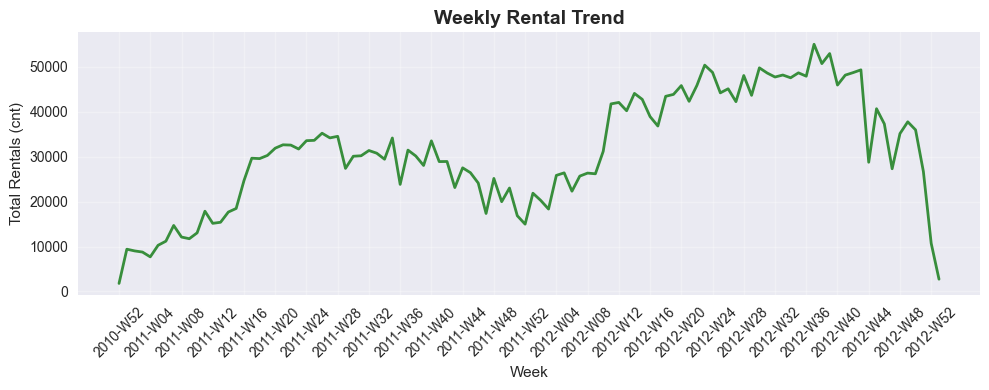

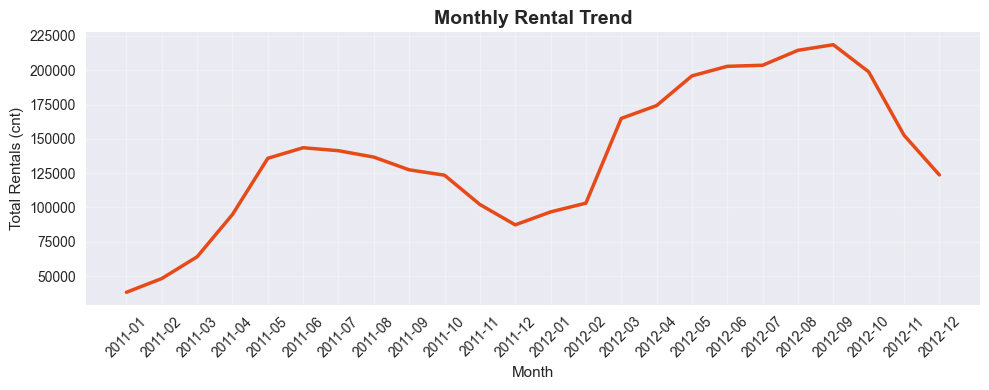

In [ ]:
# Tren Minggu-an
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.isocalendar().year
day_df['week'] = day_df['dteday'].dt.isocalendar().week

weekly = day_df.groupby(['year', 'week'])['cnt'].sum().reset_index()
weekly['period'] = weekly['year'].astype(str) + "-W" + weekly['week'].astype(str).str.zfill(2)
weekly = weekly.sort_values(['year', 'week'])  # pastikan urut

plt.figure(figsize=(10, 4))
sns.lineplot(data=weekly, x='period', y='cnt', color='#388E3C', linewidth=2)
plt.title("Weekly Rental Trend", fontsize=14, weight='bold')
plt.xlabel("Week")
plt.ylabel("Total Rentals (cnt)")
plt.xticks(weekly['period'][::4], rotation=45)  # tampilkan tiap 4 minggu biar rapi
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Tren Bulan-an
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

monthly = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index()
monthly['period'] = monthly['year'].astype(str) + "-" + monthly['month'].astype(str).str.zfill(2)
monthly = monthly.sort_values(['year', 'month'])

plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly, x='period', y='cnt', color='#E64A19', linewidth=2.5)
plt.title("Monthly Rental Trend", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Total Rentals (cnt)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

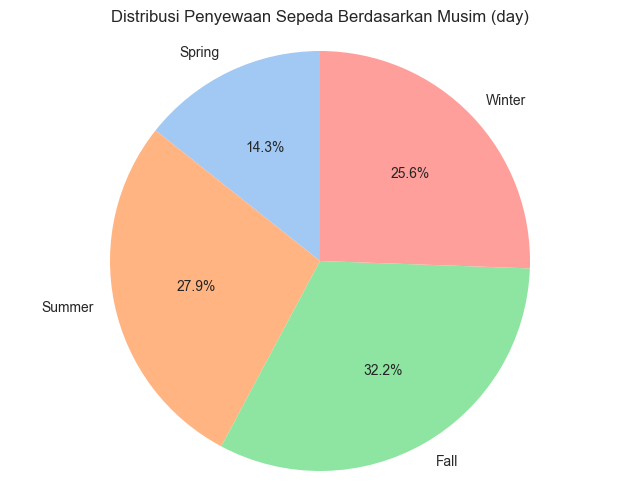

In [ ]:
summary_df = day_df.groupby('season')['cnt'].sum().reset_index()
summary_df['season_label'] = summary_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

colors_pallet = sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
plt.pie(summary_df['cnt'], labels=summary_df['season_label'], autopct='%1.1f%%', startangle=90, colors=colors_pallet)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (day)")
plt.axis('equal')  
plt.show()

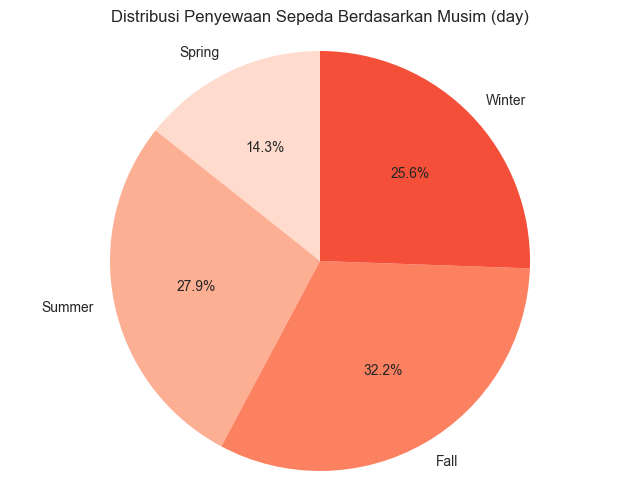

In [ ]:
summary_df = hour_df.groupby('season')['cnt'].sum().reset_index()

# label
summary_df['season_label'] = summary_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

colors_pallet = sns.color_palette("Reds")

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(summary_df['cnt'], labels=summary_df['season_label'], autopct='%1.1f%%', startangle=90, colors=colors_pallet)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (day)")
plt.axis('equal')  
plt.show()

Insight :

Weekly Trend
- Minggu-minggu tertentu terutama di tengah tahun, terlihat terjadi peningkatan signifikan, menandakan musim sibuk tahunan.

Monthly Trend
- Terlihat pola yang menunjukkan bahwa permintaan bersifat musiman dan siklikal, bukan random

- Diketahui juga bahwa penyewaan sepeda paling tinggi adalah musim Gugur dan paling rendah adalah musim Panas baik itu perhari maupun perjam

#### EDA : Tren Weekend vs Weekday

C:\Users\acer\AppData\Local\Temp\ipykernel_10672\2562327571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='weekday', y='cnt', palette='viridis', errorbar=None)


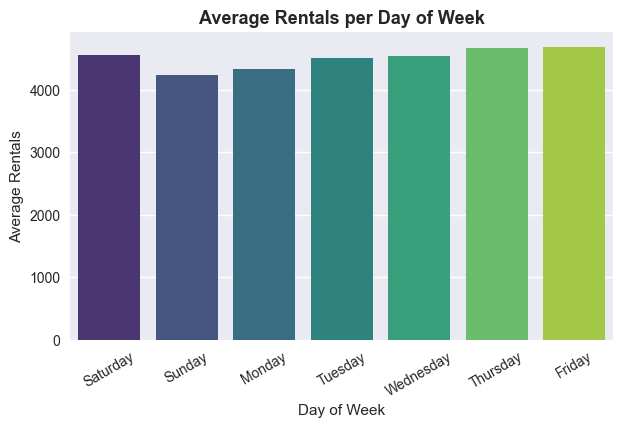

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=day_df, x='weekday', y='cnt', palette='viridis', errorbar=None)
plt.title("Average Rentals per Day of Week", fontsize=13, weight='bold')
plt.xticks(rotation=30)
plt.ylabel("Average Rentals")
plt.xlabel("Day of Week")
plt.show()

Insight :
- Setelah dihitung rata-rata, diketahui bahwa hari jumat-sabtu menjadi hari dengan jumlah penyewaan paling tinggi.
- Pola ini menunjukkan bahwa aktivitas sewa dipengaruhi oleh waktu luang pelanggan.

#### EDA : Tren per-Jam

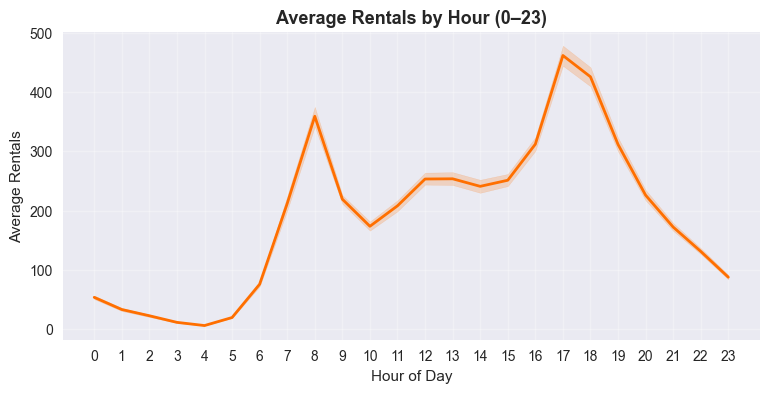

In [ ]:
plt.figure(figsize=(9,4))
sns.lineplot(data=hour_df, x='hr', y='cnt', color='#FF6F00', linewidth=2)
plt.title("Average Rentals by Hour (0–23)", fontsize=13, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.show()

Insight :
- Penyewaan sepeda mulai meningkat pada pukul 06.00–08.0 dan puncaknya terjadi pukul 16.00–17.00.

#### EDA : Heatmap Hari dengan Jam

C:\Users\acer\AppData\Local\Temp\ipykernel_10672\2556466956.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = hour_df.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')


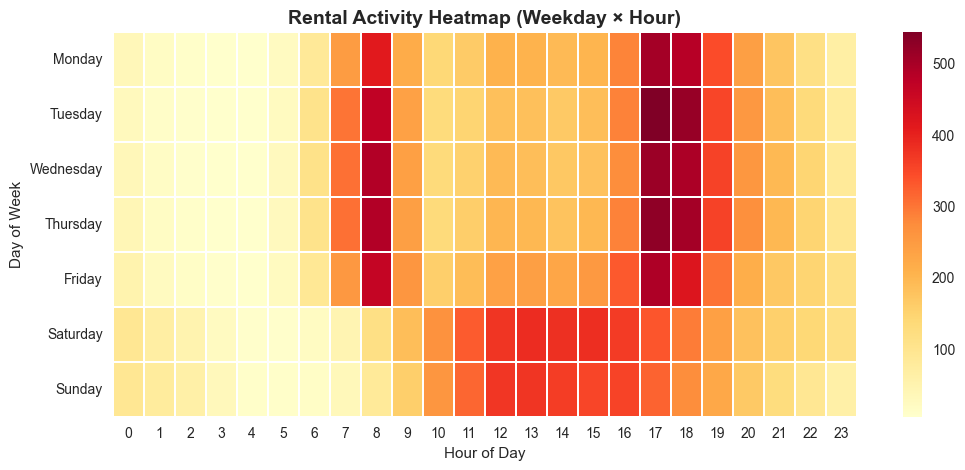

In [ ]:
WEEKDAY_ORDER = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

if hour_df['weekday'].dtype in ['int64', 'float64']:
    weekday_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    hour_df['weekday'] = hour_df['weekday'].map(weekday_map)

hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=WEEKDAY_ORDER, ordered=True)

pivot = hour_df.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')

plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.3)
plt.title("Rental Activity Heatmap (Weekday × Hour)", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


Insight : 
- Warna panas (merah tua) dominan pada waktu sore hari di weekday dan hampir sepanjang hari di weekend.
- Weekday pattern: puncak sore (setelah jam kerja).
- Weekend pattern: demand tinggi dari pagi hingga malam.

#### Penyewaan Sepeda berdasarkan Cuaca

C:\Users\acer\AppData\Local\Temp\ipykernel_10672\3054199226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette="Blues")


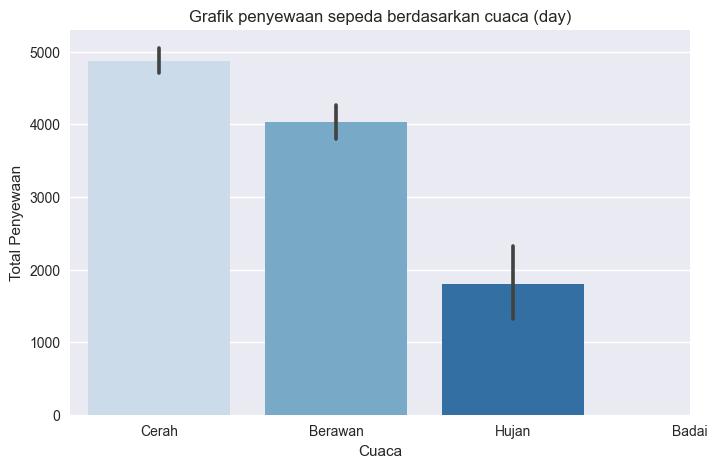

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette="Blues")
plt.xlabel("Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Grafik penyewaan sepeda berdasarkan cuaca (day)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Badai"])
plt.show()

Insight :
- Dimana kondisi musim dengan cuaca baik (Cerah) menghasilkan rata-rata penyewaan lebih tinggi ketimbang kondisi musim tidak ideal (Mendung, Hujan)
- Diketahui bahwa hari sabtu dan minggu memiliki jumlah penyewaan yang lebih tinggi

C:\Users\acer\AppData\Local\Temp\ipykernel_10672\285526730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="Greens")


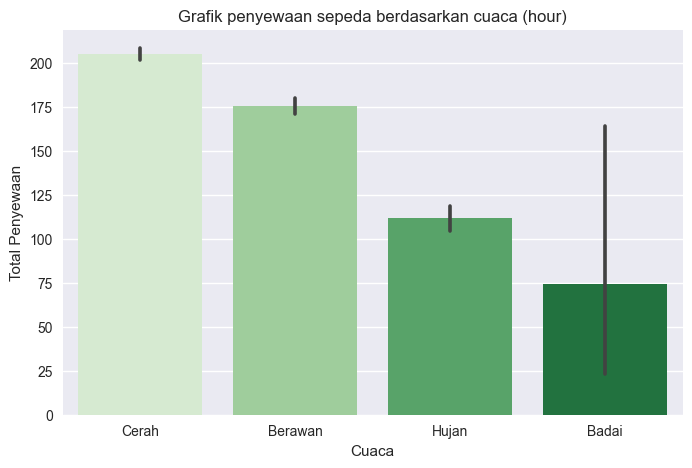

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="Greens")
plt.xlabel("Cuaca")
plt.ylabel("Total Penyewaan")
plt.title("Grafik penyewaan sepeda berdasarkan cuaca (hour)")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan", "Badai"])
plt.show()

Insight :
- Pada grafik ini, diketaui bahwa pada cuaca badai masih terdapat pengguna yang menyewa sepeda dengan kurun waktu perjam